## best score 0.90

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder

In [2]:
train = pd.read_csv('Data/our_train.csv')
test = pd.read_csv('Data/our_test.csv')
val = pd.read_csv('Data/our_val.csv')
df = pd.read_csv('Data/train.csv')

In [3]:
X_train = train.drop('NObeyesdad', axis=1)
y_train = train['NObeyesdad']
X_test = test.drop('NObeyesdad', axis=1)
y_test = test['NObeyesdad']
X_val = val.drop('NObeyesdad', axis=1)
y_val = val['NObeyesdad']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
#categorical columns
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [6]:
for col in cat_cols:
    print(df[col].value_counts())
    print()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

FAVC
yes    18982
no      1776
Name: count, dtype: int64

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

SMOKE
no     20513
yes      245
Name: count, dtype: int64

SCC
no     20071
yes      687
Name: count, dtype: int64

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64



In [10]:
CAEC_dict = {'no': 0, 'Sometimes': 0.33, 'Frequently': 0.66, 'Always': 1 }
CALC_dict = {'no': 0, 'Sometimes': 0.5, 'Frequently': 1}

In [32]:
X_train['CAEC'] = X_train['CAEC'].map(CAEC_dict)
X_train['CALC'] = X_train['CALC'].map(CALC_dict)

In [34]:
X_test['CAEC'] = X_test['CAEC'].map(CAEC_dict)
X_test['CALC'] = X_test['CALC'].map(CALC_dict)

In [35]:
X_val['CAEC'] = X_val['CAEC'].map(CAEC_dict)
X_val['CALC'] = X_val['CALC'].map(CALC_dict)

In [26]:
cat_cols2 = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']

In [36]:
#change categorical columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols2:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])
    X_val[col] = le.fit_transform(X_val[col])

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [80]:
correlation_matrix = df.corr()

<AxesSubplot:>

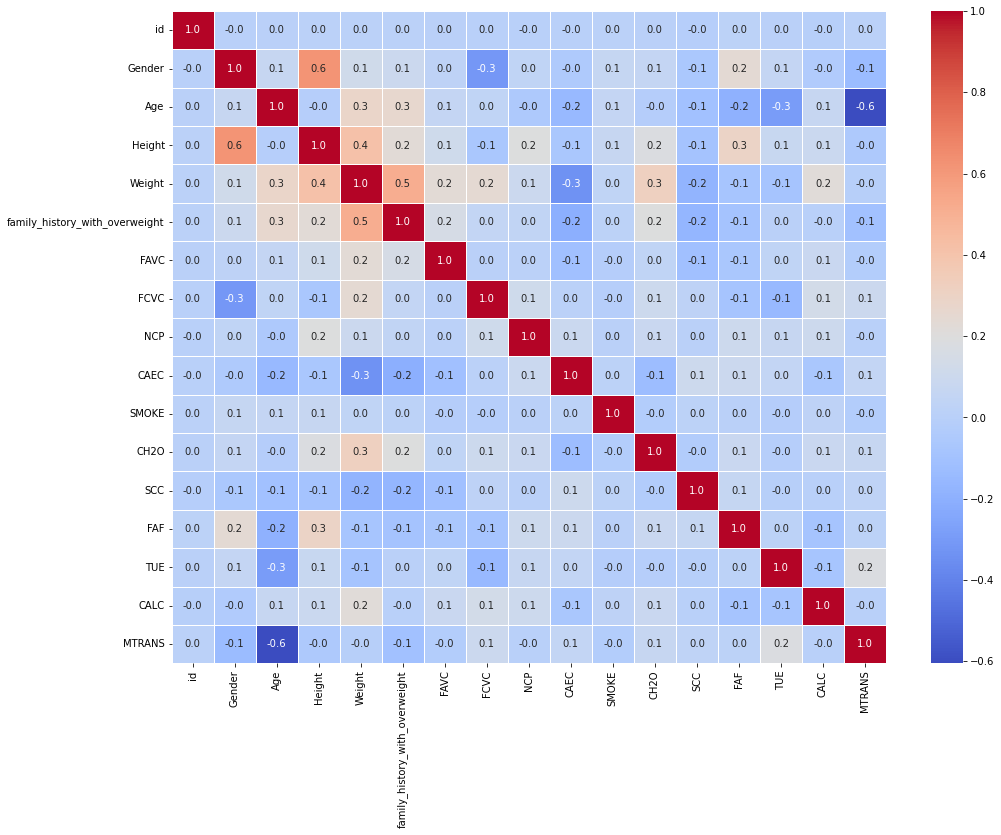

In [81]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [40]:
# jakiś pierwszy lepszy XGbooster
model = XGBClassifier(
    random_state=1,
    n_estimators=1200,  # Liczba drzew
    learning_rate=0.01,  # Szybkość "uczenia" się
    booster="gbtree",  # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
    max_depth=5,  # Maksymalna głębokość drzewa    
)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_val)
class_report1 = classification_report(y_val, y_pred1)
print("Classification Report:\n", class_report1)
conf_matrix1 = confusion_matrix(y_val, y_pred1)
print("\nConfusion Matrix:")
print(conf_matrix1)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       525
           1       0.86      0.89      0.88       624
           2       0.89      0.86      0.88       604
           3       0.96      0.97      0.97       714
           4       0.99      1.00      0.99       837
           5       0.80      0.78      0.79       532
           6       0.79      0.80      0.80       523

    accuracy                           0.90      4359
   macro avg       0.89      0.89      0.89      4359
weighted avg       0.90      0.90      0.90      4359


Confusion Matrix:
[[483  38   1   0   0   2   1]
 [ 24 558   0   0   0  33   9]
 [  2   1 522  22   3  19  35]
 [  0   0  12 696   3   0   3]
 [  1   0   0   1 834   1   0]
 [  1  39  12   0   0 416  64]
 [  0  11  37   5   0  49 421]]


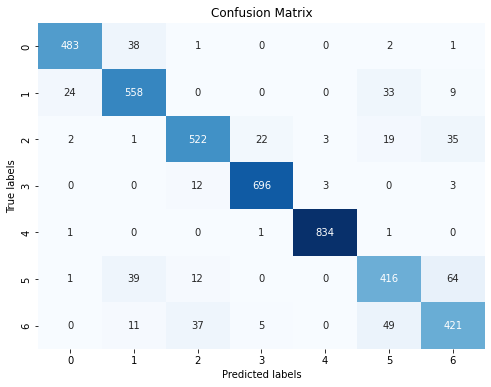

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# szukanie lepszych hiperparametrów (trochę długo się liczy)
clf = XGBClassifier(random_state=1)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 500, 1000, 1200],  # Number of trees
    'learning_rate': [0.1, 0.01, 1],
    'max_depth': [1, 3, 5, 7]
}

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1200}
Best Score: 0.9048178735782798


In [43]:
model = XGBClassifier(
    random_state=1,
    n_estimators=1200,  # Liczba drzew
    learning_rate=0.01,  # Szybkość "uczenia" się
    booster="gbtree",  # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
    max_depth=7,  # Maksymalna głębokość drzewa    
)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_val)
class_report1 = classification_report(y_val, y_pred1)
print("Classification Report:\n", class_report1)
conf_matrix2 = confusion_matrix(y_val, y_pred1)
print("\nConfusion Matrix:")
print(conf_matrix1)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       525
           1       0.86      0.88      0.87       624
           2       0.90      0.86      0.88       604
           3       0.96      0.98      0.97       714
           4       0.99      1.00      0.99       837
           5       0.78      0.78      0.78       532
           6       0.78      0.79      0.78       523

    accuracy                           0.90      4359
   macro avg       0.89      0.89      0.89      4359
weighted avg       0.90      0.90      0.90      4359


Confusion Matrix:
[[483  38   1   0   0   2   1]
 [ 24 558   0   0   0  33   9]
 [  2   1 522  22   3  19  35]
 [  0   0  12 696   3   0   3]
 [  1   0   0   1 834   1   0]
 [  1  39  12   0   0 416  64]
 [  0  11  37   5   0  49 421]]


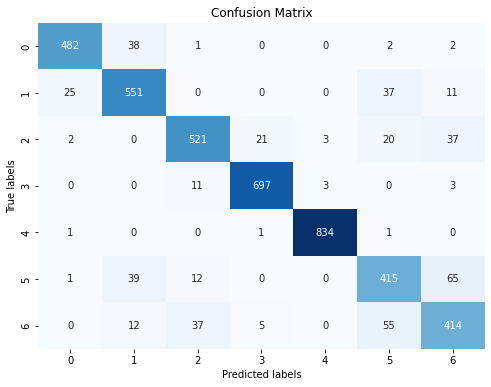

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()